### Visualization for belief partition decoding, combined across both trial events
- interested also in subpopulation defined with either combination of 95th or 99th sig level for belief partitions, across both trial events

### Imports

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

In [3]:
def plot_combined_accs(args):
    args.trial_event = "StimOnset"
    stim_res = belief_partitions_io.read_results(args, FEATURES)
    args.trial_event = "FeedbackOnsetLong"
    fb_res = belief_partitions_io.read_results(args, FEATURES)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey='row', width_ratios=[stim_res.Time.nunique(), fb_res.Time.nunique()])
    visualization_utils.visualize_preferred_beliefs(args, stim_res, ax1, hue_col="mode")
    ax1.set_xlabel(f"Time Relative to Stim Onset")

    visualization_utils.visualize_preferred_beliefs(args, fb_res, ax2, hue_col="mode")
    ax2.set_xlabel(f"Time Relative to Feedback Onset")

    fig.tight_layout()

def plot_combined_cross_accs(args):
    args.trial_event = "StimOnset"
    stim_res = belief_partitions_io.read_results(args, FEATURES)
    cross_stim_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
    args.model_trial_event = "FeedbackOnsetLong"
    fb_model_cross_stim_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
    args.model_trial_event = None


    args.trial_event = "FeedbackOnsetLong"
    fb_res = belief_partitions_io.read_results(args, FEATURES)
    cross_fb_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
    args.model_trial_event = "StimOnset"
    stim_model_cross_fb_res = belief_partitions_io.read_cross_time_results(args, FEATURES, avg=True)
    args.model_trial_event = None


    fig, axs = plt.subplots(
        2, 2, figsize=(11, 10),                            
        width_ratios=[cross_stim_res.TestTime.nunique(), cross_fb_res.TestTime.nunique()],
        height_ratios=[cross_stim_res.TestTime.nunique(), cross_fb_res.TestTime.nunique()],
        sharex="col",
        sharey="row",
    )
    all_res = pd.concat((cross_stim_res, stim_model_cross_fb_res, fb_model_cross_stim_res, cross_fb_res))
    all_max = all_res.Accuracy.max()
    visualization_utils.visualize_cross_time(args, cross_stim_res, stim_res, axs[0, 0], cbar=False, vmax=all_max)
    visualization_utils.visualize_cross_time(args, stim_model_cross_fb_res, fb_res, axs[0, 1], cbar=False, vmax=all_max)
    visualization_utils.visualize_cross_time(args, fb_model_cross_stim_res, stim_res, axs[1, 0], cbar=False, vmax=all_max)
    visualization_utils.visualize_cross_time(args, cross_fb_res, fb_res, axs[1, 1], cbar=False, vmax=all_max)

    # Adjust subplots to make space for colorbar
    fig.subplots_adjust(right=0.85)

    # Create a single colorbar to the right of ax2
    cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(axs[1, 1].collections[0], cax=cbar_ax, orientation='vertical')
    cbar.set_label('Accuracy')
    # fig.tight_layout()



### Pref, belief_partition_all_time_99th

Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


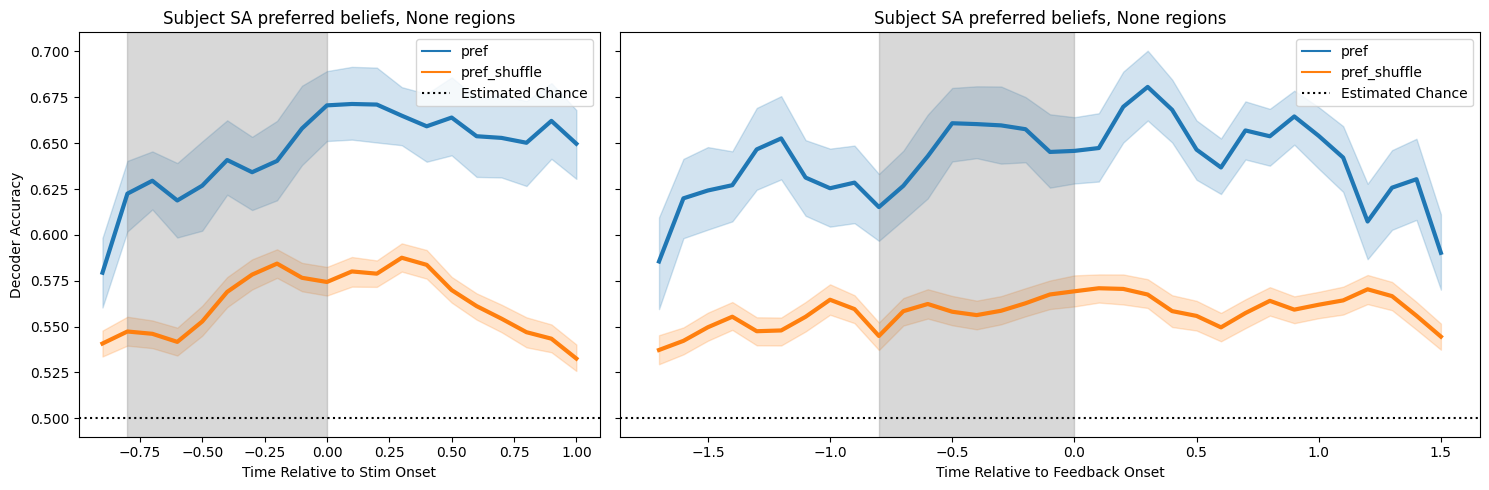

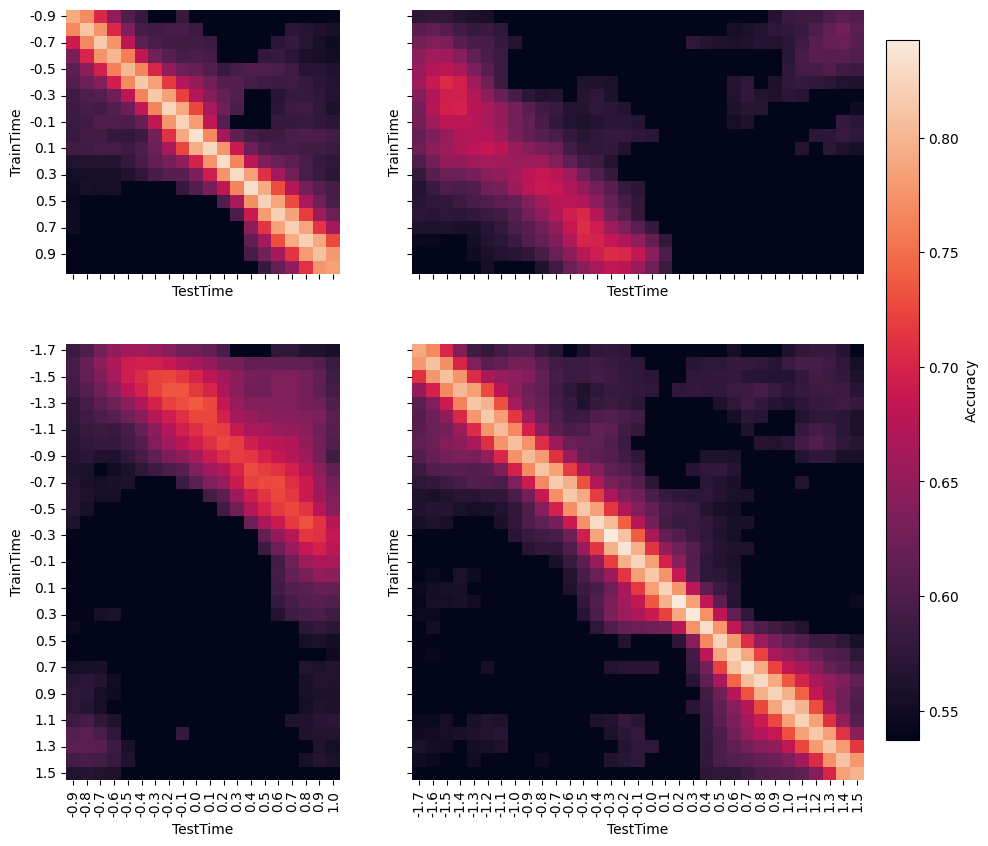

In [4]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_all_time_99th"

plot_combined_accs(args)
plot_combined_cross_accs(args)



### Conf, belief partition all time 99th

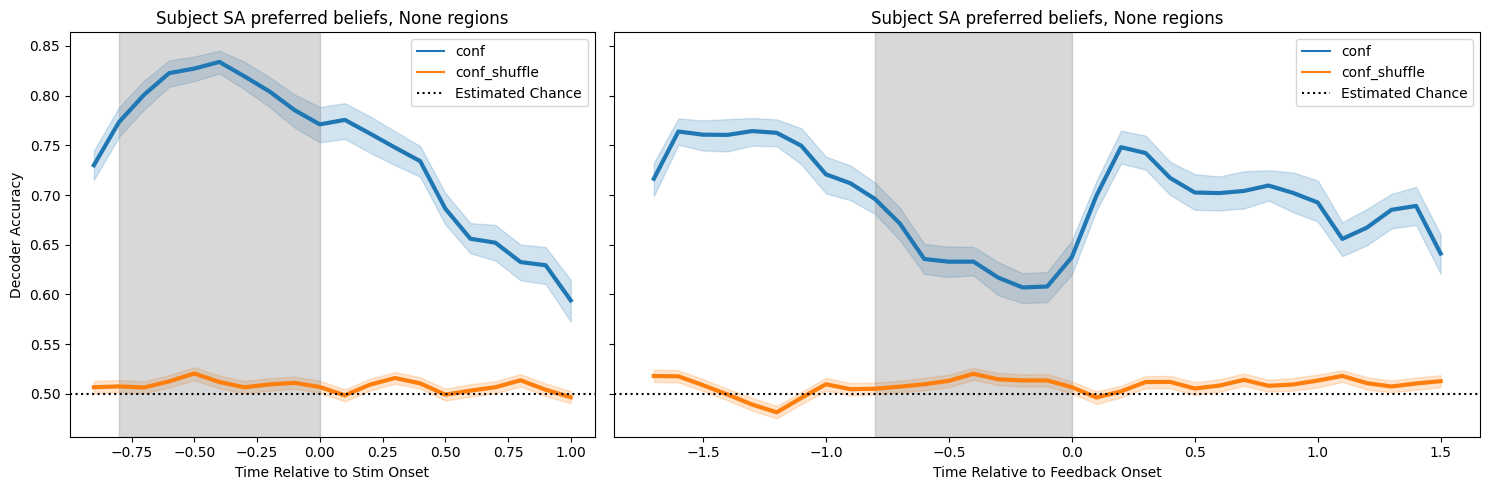

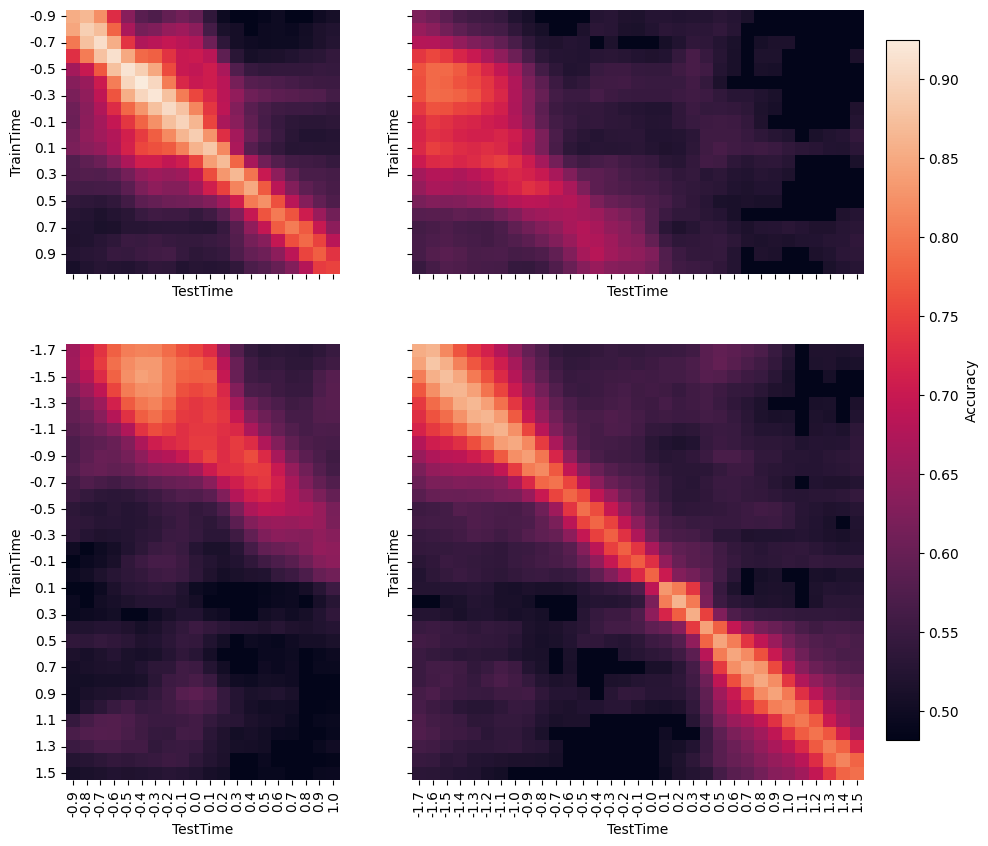

In [8]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_all_time_99th"

plot_combined_accs(args)
plot_combined_cross_accs(args)


### Pref, belief_partition_all_time_95th

Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENT

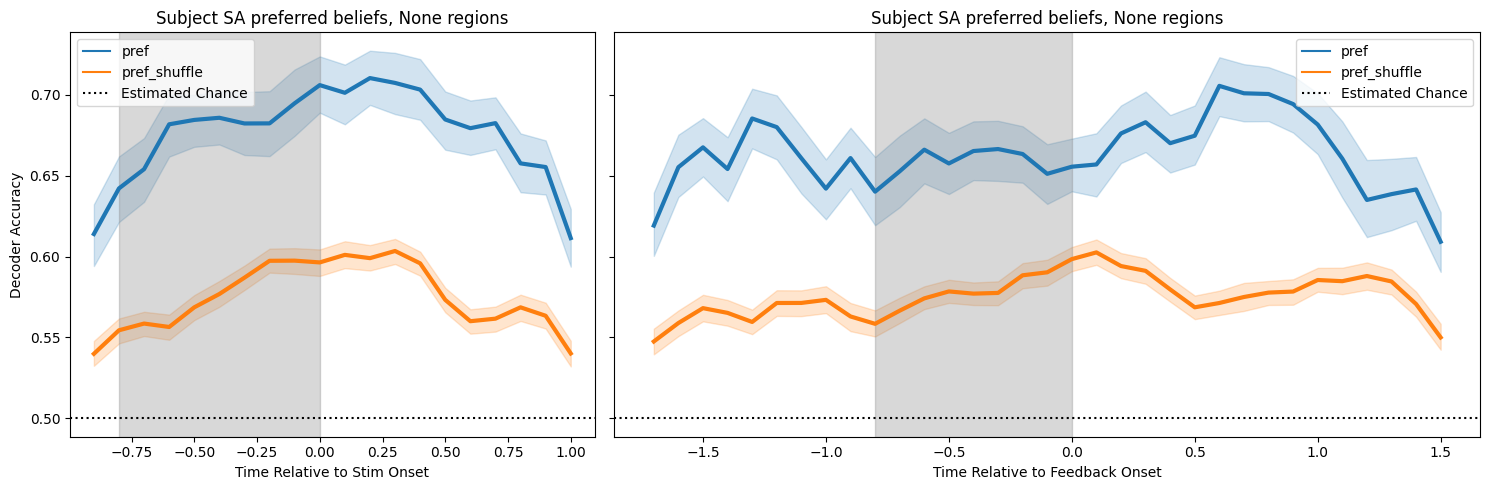

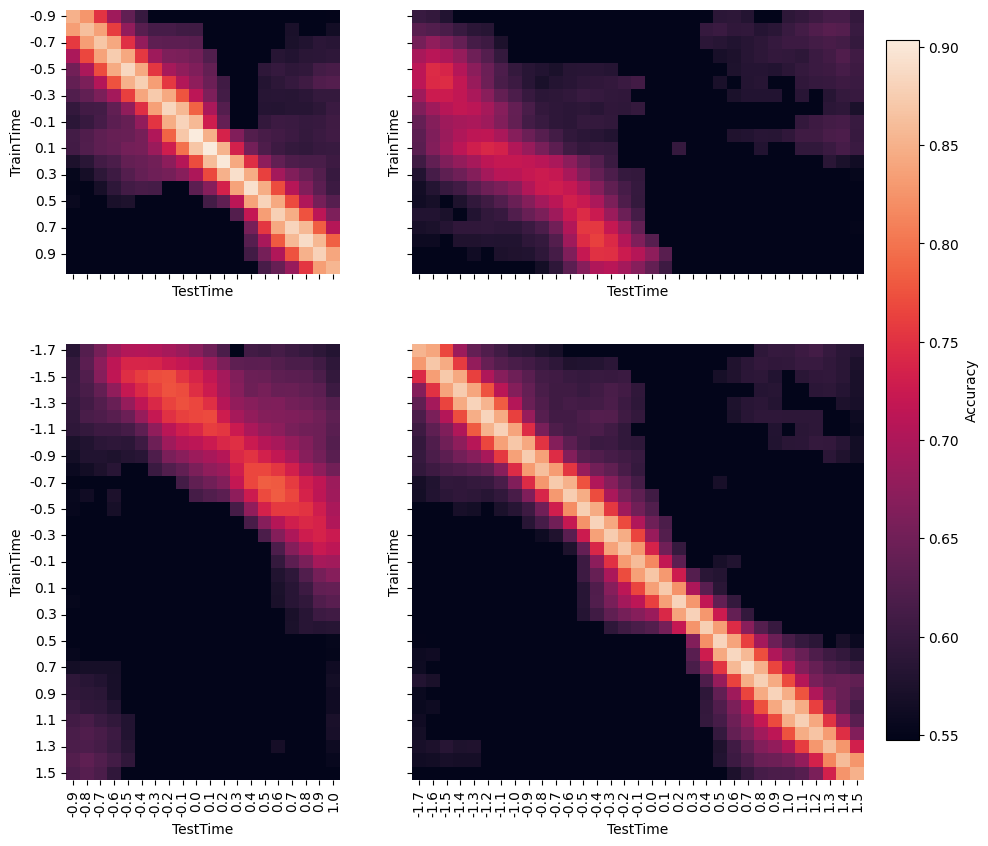

In [11]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_all_time_95th"

plot_combined_accs(args)
plot_combined_cross_accs(args)


### Conf, belief partition all time 95th

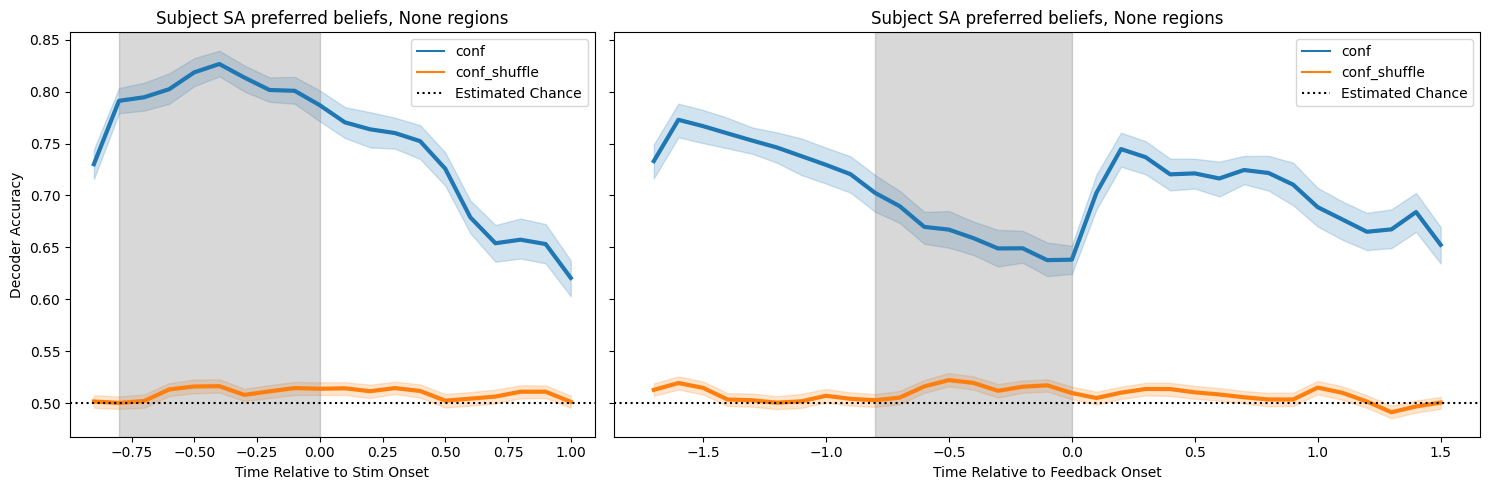

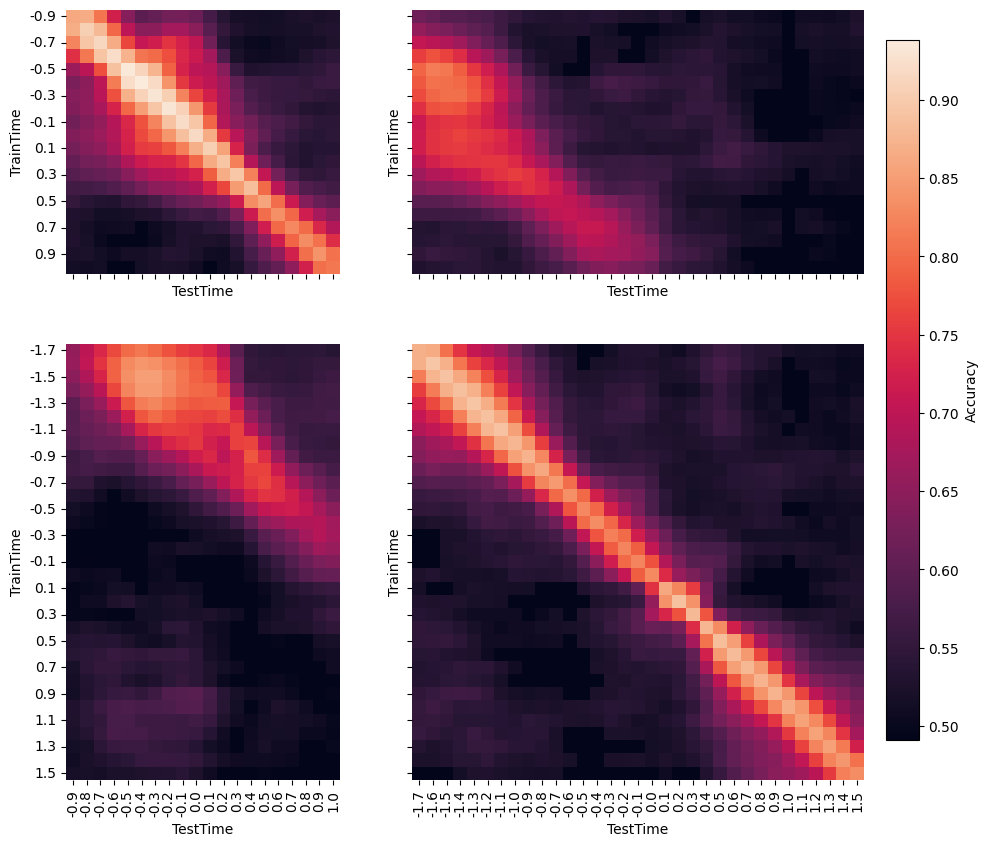

In [12]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_all_time_95th"

plot_combined_accs(args)
plot_combined_cross_accs(args)
